# Supervised Learning :

### Classification (categorical data).
In classification we try to predict from a list of predefined choices.

- Binary classification (tumor: benign, malignant).
- Multiclass classification (books: maths, physics, stats, psychology, etc.).
- Example algorithms: KNN, Linear Models, Decision Trees, SVMs, etc.

### Regression (continuous data).
- Predicting the income of someone based on the age, the education and so on or predicting stock market, etc...
- Example algorithms: KNN, Linear Models, Decision Trees, SVMs, etc.

Linear models (LinReg, LogReg, Lasso, Ridged, etc) : make predictions according to a linear function of the input features.
Many ML algorithms (including those specified above) can be used for both classification and regression.

## <center> Logistic Regression </center>

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [1]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Prerequisites : Necessary imports

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cancer = load_breast_cancer()
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

#### Create and test the model :
1. Split the data.
2. Instanciate the Logistic Regression with the default parameters.

In [106]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

X = pd.DataFrame(np.c_[cancer_df['worst radius'], cancer_df['worst texture'], cancer_df['worst smoothness']], columns=['worst radius','worst texture', 'worst smoothness'])
Y = cancer.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

lreg = LogisticRegression().fit(X_train, Y_train)

cancer_pred = lreg.predict(X_test)
cancer_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1])

In [107]:
import plotly

y_df=pd.DataFrame(Y_test)
cancer_pred_df = pd.DataFrame(cancer_pred)

plt1 = plotly.plot(y_df,"scatter")
plt1.layout.title="Test"
plt1.show()

plt2 = plotly.plot(cancer_pred_df,"scatter")
plt2.layout.title="Prediction"
plt2.show()

plt3 = plotly.plot(y_df,"scatter")
plt3.add_scatter(y=cancer_pred, mode="markers", opacity=0.4, name="Prediction")
plt3.layout.title="Test vs prediction"
plt3.show()

#### Let's evaluate the algorithm :

In [108]:
# Fill here
print("lreg.coef_ : "+str(lreg.coef_))
print("lreg.intercept_ : "+str(lreg.intercept_))

lreg.coef_ : [[-1.13208306 -0.23913635 -0.7593138 ]]
lreg.intercept_ : [25.14689799]


#### How to improve it ?

Regularization is used to prevent overfitting (over-training).

Penalty : The norm used in the penalization.
- L1 - assumes only a few features are important.
- L2 - does not assume only a few features are important - used by default in scikit-learn Logistic Regression.

'C': Parameter to control the strength of regularization. By default C is 1.
- Lower C => log_reg adjusts to the majority of data points.
- Higher C => correct classification of each data point.

#### Can we work with the parameters to make it even better ?
    
Instanciate the Logistic Regression with the C parameter.
1. C parameter to control the strength of regularization. By default C is 1.
2. Max_iter parameter Maximum number of iterations taken for the solvers to converge.
3. Solver {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs : Algorithm to use in the optimization problem.

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;


#### Tune C and max_iter parameters to improve results :

In [109]:
# Fill here
X = pd.DataFrame(np.c_[cancer_df['worst radius'], cancer_df['worst texture'], cancer_df['worst smoothness']], columns=['worst radius','worst texture', 'worst smoothness'])
Y = cancer.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

lreg = LogisticRegression(C=100, max_iter=1000).fit(X_train, Y_train)

cancer_pred = lreg.predict(X_test)

y_df=pd.DataFrame(Y_test)
cancer_pred_df = pd.DataFrame(cancer_pred)

plt3 = plotly.plot(y_df,"scatter")
plt3.add_scatter(y=cancer_pred, mode="markers", opacity=0.4, name="Prediction")
plt3.layout.title="Test vs prediction"
plt3.show()

#### Evaluate the algorithm :

In [110]:
# Fill Here
print("lreg.coef_ : "+str(lreg.coef_))
print("lreg.intercept_ : "+str(lreg.intercept_))

lreg.coef_ : [[ -1.19508158  -0.24209956 -34.00001272]]
lreg.intercept_ : [30.63913099]


Let's see how linear regression works in regression problems.<br>
The W (weight) and the B (offset) of the Y axis.

w[0]: 0.393906  b: -0.031804


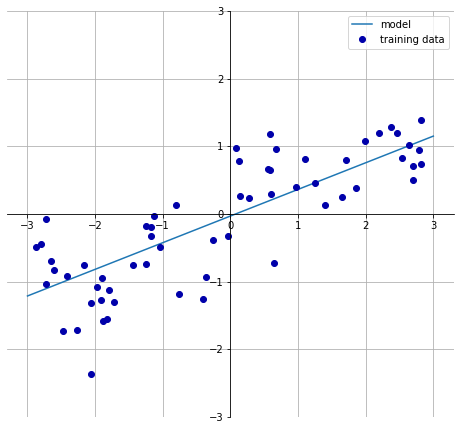

In [ ]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

To see the learned coefficients for the three different Cs.
A stronger regularization shifts the coefficients toward zero but they are not zeors.
<br><br>
This type of visualization gives a better interpretations and determines how each feature 
contributes to the decision boundary or classifying cancers.

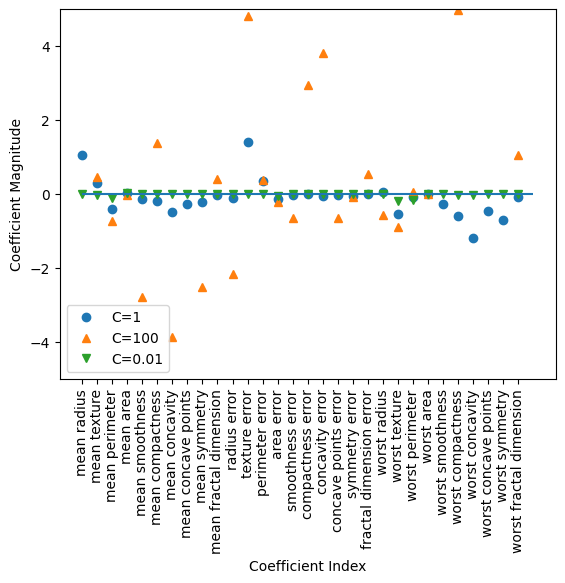

In [111]:
def log_reg():
  return LogisticRegression(max_iter=10000).fit(X_train, Y_train)

def log_reg100():
  return LogisticRegression(C=100, max_iter=10000).fit(X_train, Y_train)

def log_reg001():
  return LogisticRegression(C=0.01, max_iter=10000).fit(X_train, Y_train)

X = cancer_df
Y = cancer.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

plt.plot(log_reg().coef_.T, 'o', label='C=1')
plt.plot(log_reg100().coef_.T, '^', label='C=100')
plt.plot(log_reg001().coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend()

Linear models make predictions based on a linear function of the input features : y = (w * x) + b.
- W is the weight (or coefficient accessed via .coef_).
- B is the offset (or intercept accessed via .intercept_) of the y axis. Both are learned parameters.
- Y is the prediction (or decision).

Example for a dataset with only one input feature : y = (w[0] * x[0]) + b.

Logistic regression is a specific case of linear models and its equation looks like this : y = (w[0] * x[0]) + (w[1] * x[1]) + ... + (w[p] * x[p]) + b.


Linear models work well with large datasets, they are fast train and faster predict. However there are other modes that generalize better in low dimensional spaces.